## Load Dataset


In [2]:
import pandas as pd
train = pd.read_csv("train.csv")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 출력
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime


날짜(datetime) 컬럼 전처리 
연, 월, 일, 시, 분, 초를 따로 나누는 것입니다. 
**날짜(datetime) 컬럼을 여섯개의 다른 컬럼으로 나누어주는 것이 
날짜 컬럼을 전처리하는 핵심입니다**.

In [4]:
train["datetime"] = pd.to_datetime(train["datetime"])

# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성
# 각각의 이름을 datetime-year/month/day/hour/minute/second라고 가정
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)

train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [5]:
test["datetime"] = pd.to_datetime(test["datetime"])

# test 데이터와 train 데이터와 동일하게 연, 월, 일, 시, 분, 초 컬럼을 생성
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)

test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


## 시각화

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### datetime

### 가설


1. 분, 초는 자전거 대여량을 판가름하는데 별 영향이 없을 것

1. 일 칼럼도 별 영향이 없을 것. 하지만 일 칼럼은 분과 초와는 다르게, 1) 2월에는 28일 이후가 존재하지 않기 때문에, 29, 30, 31일은 다른 날보다 데이터가 적을 수도 있음
(예외적으로 2012년은 2월 29일이 있음), 비슷하게 2) 31일의 경우에는 다른 날에 비해 데이터가 절반 일것임. .

1. 사람의 행동 패턴 상으로 날짜나 시간이라는 개념이 자전거를 대여하는데 중요한 영향을 미칠 것임. 가령 1) 시간(hour)을 기준으로 새벽보다는 오후에 사람들이 자전거를 많이 빌릴것이며, 2) 월(month)을 기준으로 추운 여름보다는 따뜻한 봄이나 가을, 내지는 더운 여름이 더 많이 빌릴 것으로 예상



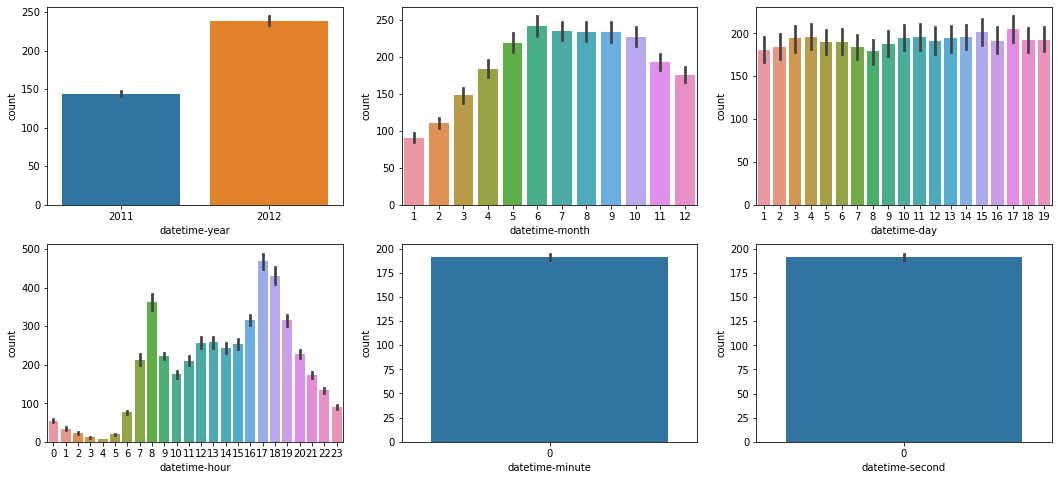

In [7]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월, 일, 시, 분, 초 별 자전거 대여량을 출력
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

### 결과

**datetime-year**
  * 2011년도의 자전거 대여량보다 2012년도의 자전거 대여량이 더 높음
   Capital Bikeshare사가 꾸준히 성장하고 있다고 간주할 수 있음

**datetime-month**
  * 주로 여름에 자전거를 많이 빌리며, 겨울에는 자전거를 많이 빌리지 않음
  * 같은 겨울이라도 12월의 자전거 대여량이 1월의 자전거 대여량보다 두 배 가까이 높아 보임
  
**datetime-day**
  *  21일 이후의 자전거 대여량에 대해서는 알 수 없음

**datetime-hour**
  * 새벽 시간에는 사람들이 자전거를 빌리지 않으며, 오후 시간에 상대적으로 자전거를 많이 빌림
  *  출근 시간과 퇴근 시간에 많이 빌림

**datetime-minute** & **datetime-second**
  * 이 두 컬럼은 x축이 모두 0
     기록되고 있지 않음

### 향후방안

1. 분과 초는 기록되지 않기 때문에 feature에서 제거해도 될 것으로 봄
2. train 데이터와 test 데이터를 나누는 기준이 되는 컬럼이 바로 일 컬럼입니다. 이런 경우 **datetime-day**를 feature로 집어넣으면 머신러닝 알고리즘이 과적합 되는 현상이 일어날 수 있음. 그러므로 train 데이터와 test 데이터를 나누는 기준이 되는 컬럼이 있으면, 이 컬럼은 feature로 사용하지 않는 것이 바람직
3. 시간 컬럼을 보면 출퇴근시간에 사람들이 자전거를 많이 빌린다는 사실을 알 수 있음. 별도의 feature로 넣어주면 성능 향상을 꾀할 수 있을 듯 함

### weather 컬럼

### 가설

1. 안 좋은 날씨일수록 자전거 대여량이 낮아질 것임 1(깨끗한 날씨)의 경우보다 4(아주 많은 비나 우박이 오는 날씨)인 경우에 자전거를 덜 빌릴 것
2. 값이 숫자(1, 2, 3, 4)로 되어있지만, 실제로는 범주형(categorical) 데이터로 처리해야 할 것임
3. 날씨마다의 편차가 있어서 어떤 날은 날씨가 좋아도 안 빌리고, 어떤 날은 날씨가 안 좋아도 많이 빌릴 수도 있음

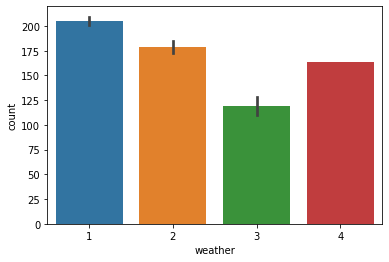

In [8]:
sns.barplot(data=train, x="weather", y="count")

### 결과

1. 생각한대로 날씨가 안 좋을수록 자전거 대여량이 낮아지는 현상을 발견 
   날씨값이 3보다 2가, 2보다 1이 더 자전거를 많이 빌리는 현상이 보임
2. 날씨가 4인 경우, 아주 많은 비가 오거나 우박이 내리는 경우에 자전거를 많이 빌리는 현상이 보임 심지어는 날씨가 2인 경우(약간의 안개나 구름)에 못지 않게 자전거를 많이 빌리는 사실을 알 수 있음
3. 그리고 시각화에서 신뢰 구간(confidence interval)을 상징하는 검은색 세로 선이 날씨가 4인 경우에는 보이지 않아서 날씨가 4인 경우에는 일반적인 분포와는 다소 다른 현상이 일어나고 있다고 판단할 수 있음

### 향후 적용 방안

1. 날씨 컬럼값이 1 ~ 3인 것만 봤을 때, 컬럼을 머신러닝 알고리즘에 feature로 넣으면 신러닝 알고리즘이 알아서 날씨에 따른 자전거 대여량의 변화량을 예측할 수 있을 것
날씨가 좋을 수록(1에 가까울수록) 자전거를 많이 빌리고, 안 좋을수록(3에 가까울수록) 자전거를 덜 빌릴 것으로 예상
1. 신뢰 구간(confidence interval)을 보면 알 수 있듯이, 날씨 컬럼값이 4인 경우는 매우 부족 (train 데이터 10,886개 기준 1개 밖에 없음) 그러므로 이 데이터를 제거하거나, 날씨 컬럼값이 4인 경우는 3으로 바꿔주면 머신러닝 알고리즘이 상대적으로 모수가 적은 데이터를 가지고 조건을 만들려는 시도를 하지 않기 때문에, 미묘하지만 성능 향상이 있을 것으로 예상

### windspeed 컬럼

### 가설

1. 이 데이터는 연속형 자료이므로 분포를 시각화하면 전형적인 정규 분포가 나올 것
2.  1) 몇몇 아웃라이어가 존재하거나, 2) 바람이 특별하게 많이 불어서 분포의 오른쪽이 길게 늘어지는 현상이 생길 것
3. 바람이 너무 많이 불면 사람들이 자전거를 덜 빌릴 것으로 예

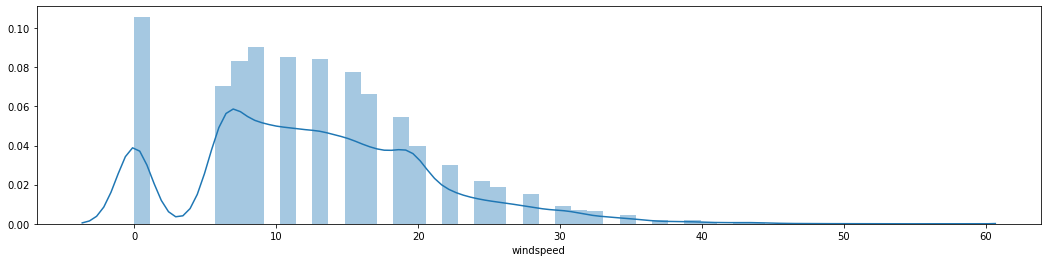

In [9]:
plt.figure(figsize = (18, 4))

# windspeed 데이터의 전체 분포(distribution)을 시각화
sns.distplot(train["windspeed"])

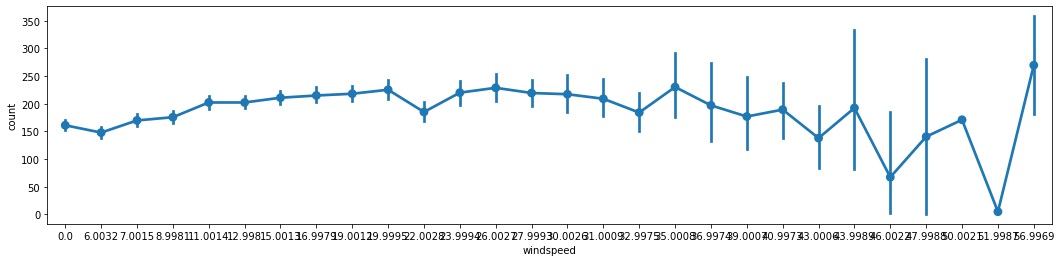

In [10]:
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 풍속(windspeed)에 따른 자전거 대여량의 변화를 시각화합니다.
# x축에는 풍속(windspeed)을, y축에는 자전거 대여량(count)을 집어넣습니다.
sns.pointplot(data = train, x="windspeed", y="count")

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


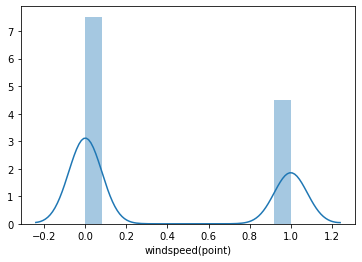

In [11]:
# 풍속(windspeed)데이터에서 소수점이 아닌 나머지를 제거합니다.
# 가령 풍속이 16.9979일 경우, 이를 정수형(int)으로 변환하여 16으로 만든 뒤 두 개를 뺍니다. (그러면 0.9979가 나옵니다)
# 이를 windspeed(point)라는 이름의 새로운 컬럼에 할당합니다.
train["windspeed(point)"] = train["windspeed"] - train["windspeed"].astype('int')

# windspeed(point) 컬럼의 중복을 제거하여 종류를 출력합니다.
# 간결할 형태로 출력하기 위해, 소수점 3자리로 줄입니다.
print(train["windspeed(point)"].unique().round(3))

# seaborn의 distplot으로 풍속(windspeed) 데이터를 시각화합니다.
# windspeed 데이터의 전체 분포(distribution)을 시각화합니다.
sns.distplot(train["windspeed(point)"])

### 결과

1. 분포는 전반적으로 정규 분포지만 1) 값이 연속적(continuous)이지 않고 듬성듬성 떨어져 있어서 범주형(categorical) 데이터에 가까울 것으로 예상
2. 풍속이 0인 경우가 굉장히 많음
3. 풍속이 과하게 높을수록 자전거를 덜 빌리는 현상이 보이는 것 같은데, 이는 전반적으로 모수가 부족한 듯 하여 신뢰도가 높지 않음

### 향후 방안

1. 풍속(windspeed) 데이터를 머신러닝 알고리즘에 집어넣으면 머신러닝 알고리즘의 풍속에 따른 자전거 대여량의 변화를 스스로 판단할 수 있을 것
풍속이 낮거나 높을수록 자전거를 덜 빌리고, 풍속이 적당할 때 자전거를 더 많이 빌린다는 사실 확인 가능
1. 풍속(windspeed)이 0인 경우는, 실제로는 풍속이 0이 아니라 값이 비어있을(NaN) 가능성이 있음 이 경우에는 풍속(windspeed) 데이터를 머신러닝 알고리즘에 그대로 집어넣을 경우, 실제로는 바람이 불었지만 머신러닝 알고리즘 입장에서는 바람이 불지 않았다고 간주할 수 있음
1. 풍속(windspeed)의 소수점을 자세히 보시면, 0.001xx, 0.002xx, 0.003xx나, 0.999xx, 0.998xx, 0.997xx가 대부분임. 즉, 이 값은 실수형(float)이 아닌 정수형(int)이라고 간주할 수 있음 알고리즘에 따라 다르겠지만, 풍속(windspeed) 데이터를 그대로 넣지 않고 반올림한 뒤 정수형(int) 데이터로 넣어주면 더 좋은 결과가 나올 수도 있음

### temp

### 가설

1. 풍속 데이터와 마찬가지로 이 데이터는 연속형이므로 분포를 시각화하면 전형적인 정규 분포
1. 온도가 높으면 자전거를 덜 빌릴 것 같고, 정 반대로 온도가 낮으면 자전거를 많이 빌릴 것으로 예상
1. 온도와 체감온도는 서로 상관관계가 높아, 거의 같은 성향의 데이터라고 간주할 수 있음

### temp 컬럼 시각화

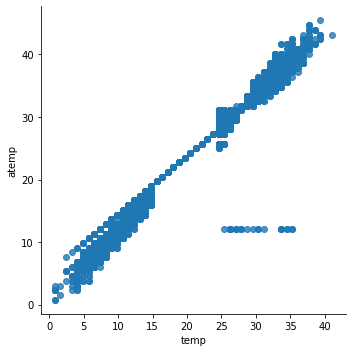

In [12]:
# seaborn의 lmplot으로 온도(temp)와 체감온도(atemp)의 상관관계를 시각화
# 여기서 추세선을 그리지 않기 위해 fit_reg 옵션은 False로 
sns.lmplot(data=train, x="temp", y="atemp", fit_reg=False)

In [13]:
train["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [14]:
train["atemp"].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

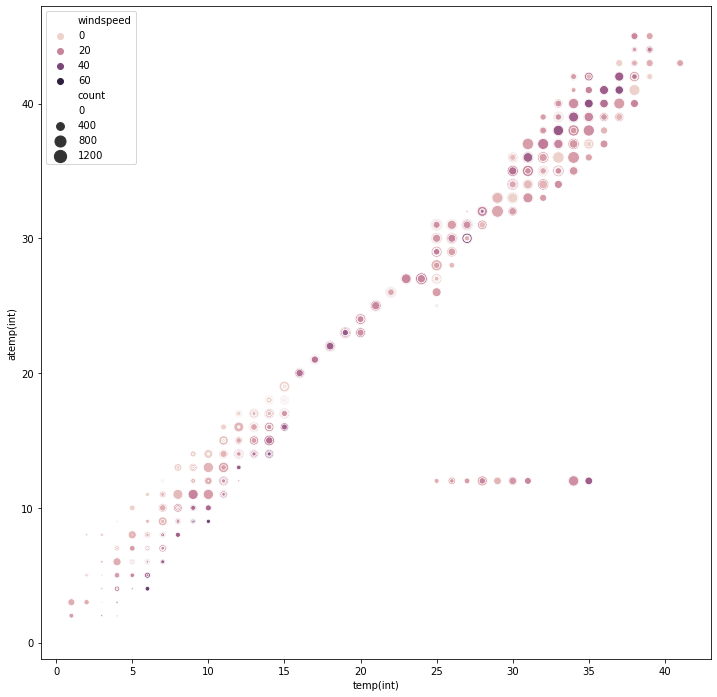

In [15]:
.train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()

plt.figure(figsize = (12, 12))

# 온도, 체감온도,풍속과 자전거 대여량간의 상관관계를 시각화합니다.

sns.scatterplot(data=train, x="temp(int)", y="atemp(int)", hue="windspeed", size="count", sizes=(0, 150))

In [16]:
# 정수형으로 변환한 온도(temp)와 체감온도를 빼서
# 두 값의 차이를 나타내는 temp(difference)라는 새로운 컬럼을 추가
train["temp(difference)"] = train["temp(int)"] - train["atemp(int)"]


train[["temp(int)", "atemp(int)", "temp(difference)"]].head()

,temp(int),atemp(int),temp(difference)
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0


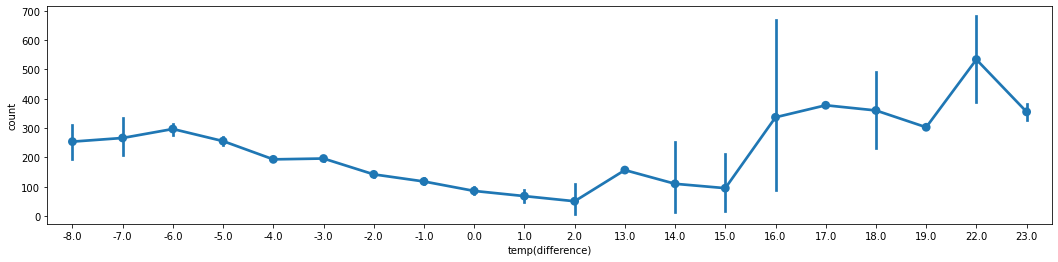

In [17]:
plt.figure(figsize = (18, 4))

# seaborn의 point으로 temp(difference)에 따른 자전거 변화량을 시각화
sns.pointplot(data=train, x="temp(difference)", y="count")

In [18]:

train["temp(difference)"].value_counts()

-4.0     5106
-3.0     2097
-2.0     1415
-5.0     1049
-1.0      509
-6.0      405
 0.0      219
 1.0       32
-7.0       21
 22.0       5
-8.0        5
 14.0       5
 2.0        4
 16.0       3
 15.0       3
 18.0       3
 23.0       2
 17.0       1
 13.0       1
 19.0       1
Name: temp(difference), dtype: int64

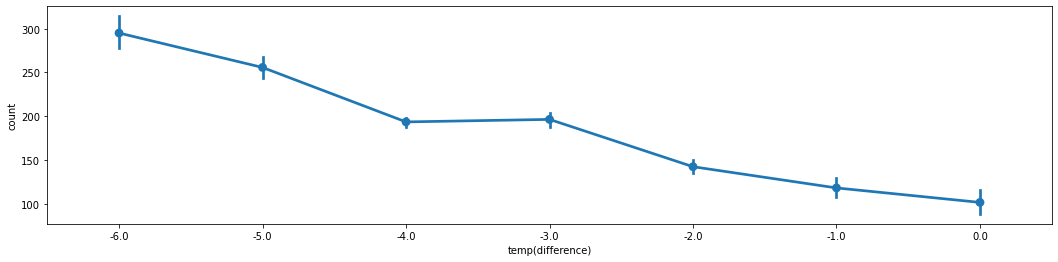

In [19]:
# temp(difference)가 -6보다 작은 데이터는 -6으로 통일
train.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6

# temp(difference)가 0보다 큰 데이터는 0으로 통일
train.loc[train["temp(difference)"] >  0, "temp(difference)"] = 0

plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 temp(difference)에 따른 자전거 변화량을 시각화
sns.pointplot(data=train, x="temp(difference)", y="count")

### 결과

1. 온도와 체감온도는 연속형이며, 서로 상관관계가 높다는 사실을 알 수 있음.
1. 온도나 체감온도가 낮을수록 자전거를 덜 빌리고, 높을수록 자전거를 많이 빌린다는 사실을 알 수 있음
1. 온도에 비해서 체감온도가 상대적으로 높거나 낮은 경우가 있는데, 특히 체감온도가 온도보다 높을 경우 자전거를 더 많이 빌린다는 현상을 알 수 있음

### 향후 방안

1. 온도 컬럼을 머신러닝 알고리즘에 넣어주면 머신러닝 알고리즘이 온도에 따른 자전거 대여량의 변화량을 예측하면서 성능이 올라갈 것

1. 온도와 체감온도의 차이가 자전거 대여량을 예측하는데 도움이 된다는 새로운 사실을 알 수 있음

### datetime-dayofweek

이번에 분석할 데이터는 요일을 나타내는 데이터, 일명 ```datetime-dayofweek```입니다. 이 데이터는 현재 feature로 가지고 있지만, 날짜와 시간을 나타내는 ```datetime``` 컬럼에서 추출할 수 있습니다. (ex: ```train["datetime"].dt.day_name()```) 앞서 분석과 마찬가지로, 날짜 컬럼도 탐험적 데이터 분석을 통해 분석해보겠습니다.

In [20]:
# train 데이터에 요일을 나타내는 새로운 컬럼을 생성
# 이 컬럼의 이름을 datetime-dayofweek이라고 가정
train["datetime-dayofweek"] = train["datetime"].dt.day_name()

# 이 값은 0(월요일) ~ 6(일요일) 사이의 값
train["datetime-dayofweek(int)"] = train["datetime"].dt.dayofweek
print(train.shape)
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()

(10886, 24)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-01 00:00:00,Saturday,5
1,2011-01-01 01:00:00,Saturday,5
2,2011-01-01 02:00:00,Saturday,5
3,2011-01-01 03:00:00,Saturday,5
4,2011-01-01 04:00:00,Saturday,5


In [21]:
test["datetime-dayofweek"] = test["datetime"].dt.day_name()

# 숫자화된 요일 정보
test["datetime-dayofweek(int)"] = test["datetime"].dt.dayofweek
print(test.shape)
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-20 00:00:00,Thursday,3
1,2011-01-20 01:00:00,Thursday,3
2,2011-01-20 02:00:00,Thursday,3
3,2011-01-20 03:00:00,Thursday,3
4,2011-01-20 04:00:00,Thursday,3


### 가설

1. datetime-dayofweek 컬럼을 시각화하면 어떤 요일이냐에 따라서 자전거 대여량이 다르게 시각화될 것임
2. 비슷한 성향을 가진 근무일( 사실상 주중/주말 ) 컬럼과는 달리, 요일 컬럼은 같은 주말이라고 하더라도 토/일의 차이, 같은 주중이라고 하더라도 월/수/금의 차이가 드러날 것
3. 사람의 구체적인 생활 패턴에 따라 자전거의 대여량이 달라질 것으로 예상
가령 출퇴근을 하는 날이냐(출퇴근 시간에 많이 빌릴 것으로 예상), 주말에 노는 날이냐(주중 낮에 많이 빌릴 것으로 예상)에 따라 자전거 대여량이 달라질 것


### datetime-dayofweek 컬럼 시각화

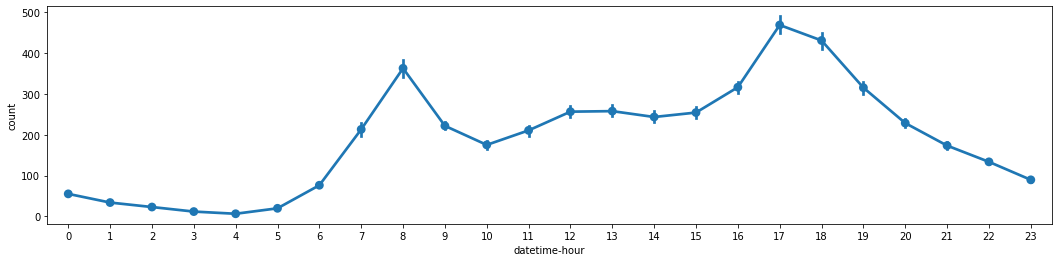

In [22]:
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 시간(datetime-hour)에 따른 자전거 변화량을 시각화
sns.pointplot(data=train, x="datetime-hour", y="count")

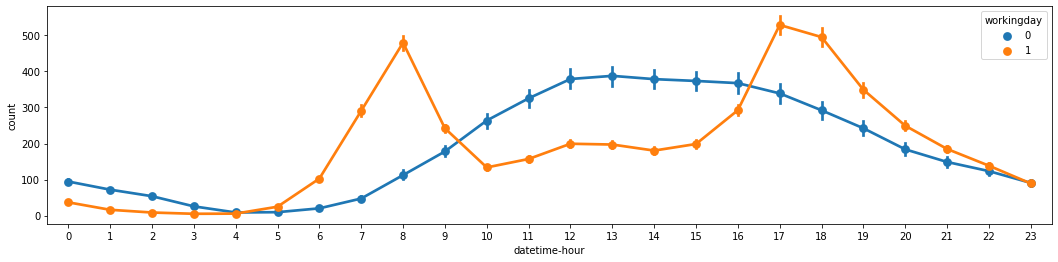

In [23]:
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 자전거 변화량을 시각화
# 확실히 근무하는 날과 근무하지 않는 날의 자전거 대여량이 명확하게 차이 있음.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

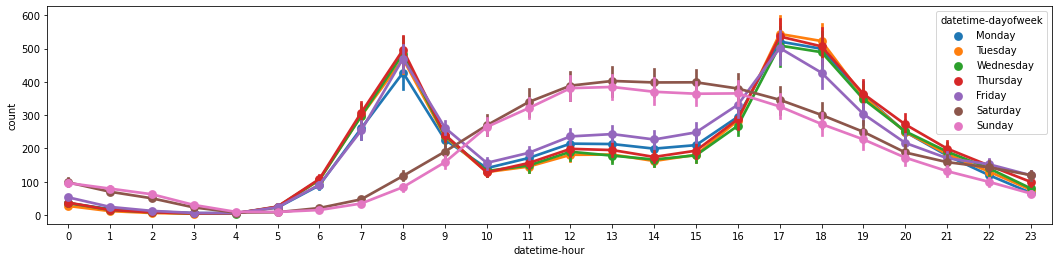

In [24]:
plt.figure(figsize = (18, 4))

# 시각화할 때 요일의 순서를 명확하게 지정하기 위해, 월~일까지의 영어 호칭을 리스트에 담음
# 이를 dayofweek_order라는 이름의 변수에 할당
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# seaborn의 pointplot으로 요일(datetime-dayofweek)과 시간(datetime-hour)에 따른 자전거 변화량을 시각화
# 여기서 hue의 값을 dayofweek_order에 지정된 순서대로 출력
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", hue_order=dayofweek_order)

### 결과

확실히 주중/주말을 나누는 workingday 컬럼에 비해, 구체적인 요일을 나타내는 datetime-dayofweek 컬럼이 더 디테일한 자전거 변화량을 나타낸다는 사실을 알 수 있습니다. 구체적으로는

1. 같은 주말이라고 하더라도 일요일이 토요일보다 자전거 대여량이 낮습니다. 일요일은 다음 날이 근무일(월요일)이므로, 여가는 토요일에 즐기고 싶은 심리 반영으로 보임
1. 같은 주중이라도 금요일이 퇴근하는 시간대(18시 ~ 20시)에 자전거 대여량이 다른 주중에 비해 낮습니다. 다음 날이 휴일(토요일)이므로, 여가를 즐기기 위해 차를 몰고 왔거나, 음주 후 다른 대중교통을 이용한것으로 추측
1. 금요일은 같은 주중이라고 하더라도 오후 시간대(10시 ~ 16시)에 자전거 대여량이 높음. 금요일과 월요일은 주중임에도 불구하고 주말과 끼여있는 요일이기 때문에, 주말의 성향을 어느정도 반영


### 향후 방안

1. 요일 컬럼을 머신러닝 모델에 집어넣으면, 머신러닝 모델이 요일에 따른 자전거 변화량의 차이를 이해하기 시작하면서 성능이 올라갈 것으로 예상
2. 같은 주말이라고 하더라도 토요일과 일요일의 차이, 같은 주중이라고 하더라도 수요일과 월요일의 차이를 이해하기 시작할 것임. 근무일 컬럼만 넣는 것 보다 요일컬럼을 넣는 것이 더 좋은 성능을 낼 것
3. 데이터는 범주형(categorical) 데이터이므로  One Hot Encoding 진행

### casual & registered

### 가설

1. 두 개의 컬럼은 자전거 대여량을 나타내는 count 컬럼과 유사하므로, 시각화를 하면 거의 유사한 패턴이 나올 것으로 예상
1. 두 회원간의 자전거 대여 성향이 다르기 때문에, 자전거를 대여하는 시기나 타이밍에 차이가 있을것임
1. 회원의 자전거 대여량에 해당하는 registered에 비해, 비회원의 자전거 대여량에 해당하는 casual컬럼이 더 패턴을 찾기 어려울 것 (비회원이라는건 그만큼 비정기적으로 자전거를 대여하는 것이기 때문에) 

### casual과 registered 컬럼 

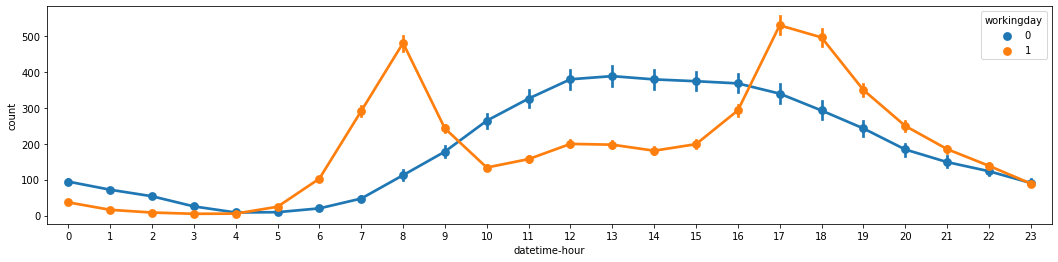

In [25]:
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

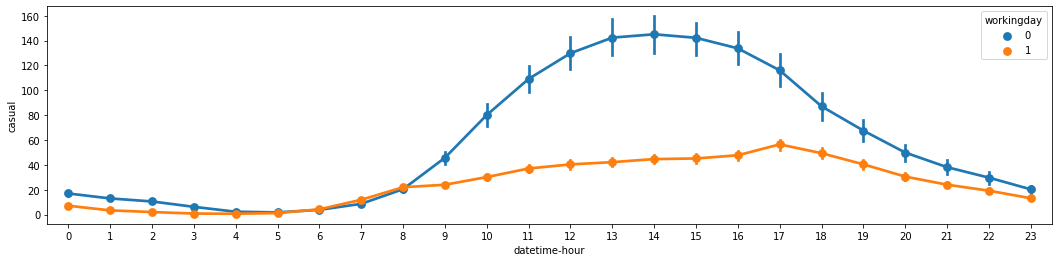

In [26]:
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday")

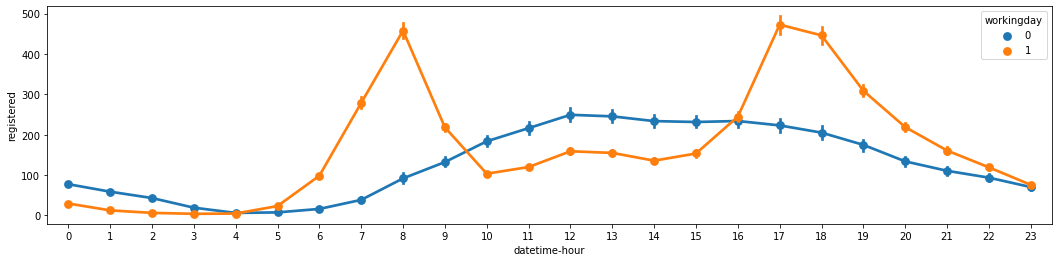

In [27]:
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 회원의 자전거 변화량(registered)을 시각화
sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday")

### 결과

1. 시간에 따른 자전거 대여량의 변화량을 비교해보니, 비회원과 회원의 차이가 극명하게 난다는 사실을 알 수 있음
2. 회원은 주로 출퇴근할때 자전거를 빌리고, 비회원은 주로 주말에 놀 때 자전거를 빌린다는 사실을 알 수 있음
3. 시각화의 세로축(y축)을 보면 비회원보다는 회원이 자전거를 더 많이 빌린다는 사실을 알 수 있음

### 향후 방안

1.  비회원과 회원 정보는 test 데이터에 넣을 수 없기 때문에 feature로 활용 불가능
2. 하지만  머신러닝 모델로 자전거 대여량을 나타내는 count 컬럼을 예측하는게 아닌, 비회원과 회원 컬럼을 각각 label로 간주하고 예측한 뒤 이를 더하는 것도 방법

### datetime-year & datetime-month

### 가설

1. 연도의 경우는 전반적인 트렌드가 상승하는지 하강하는지, 월의 경우에는 트렌드와 더불어 계절(봄, 여름, 가을, 겨울)을 볼 수 있을 것
1. 연도와 월을 따로 보는 것 보다, 붙여서 보는 것이 트렌드의 디테일함을 보는데 더 유리할 것으로 보임

### ```datetime-year```와 ```datetime-month``` 컬럼 시각화

In [28]:
# 연도(datetime-year)와 월(datetime-month)를 앞뒤로 붙인 datetime-year_month라는 이름의 컬럼을 추가
# 이 컬럼에는 2011년 1월부터 2012년 12월까지 총 24개의 값
train["datetime-year_month"] = train["datetime-year"].astype('str') + '-' + train["datetime-month"].astype('str')

print(train.shape)

train[["datetime", "datetime-year_month"]].head()

(10886, 25)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


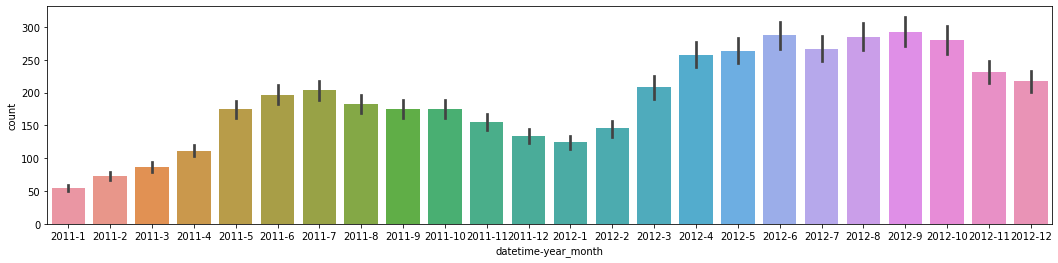

In [29]:
plt.figure(figsize = (18, 4))

sns.barplot(data=train, x="datetime-year_month", y="count")

### 결과

1. 회사가 전반적으로 성장중임 (=자전거 대여량이 올라감) 
2011년도 1월에 비해, 2012년도 12월에는 자전거 대여량이 현격하게 증가하고 있음
2. 월만 놓고 보면 얼핏 12월이 1월보다 자전거 대여량이 높아 보였지만, 연도와 월을 합쳐서 보니 12월이 1월보다 자전거 대여량이 높은 이유는 트렌드의 차이라는 것을 알수 있음 

### 향후 방안

2.  이 트렌드의 개념을 반영하기 위해 1) 트렌드에 맞게 자전거 대여량을 보정해주거나, 2) 2011년 1월부터 2012년 12월까지의 24개의 기간을 머신러닝 모델에 넣어주는(즉, 연과 월을 따로 넣지 않고 붙여서 함께 넣어주는) 방법 사용.
3. 정 반대로, 이 트렌드를 이해하지 못하고 오해할 소지가 있다면 은 datetime-month을 feature에서 제거

## Train


  * **Feature**: 1) 계절(```season```), 2) 공휴일(```holiday```), 3) 근무일(```workingday```), 4) 날씨(```weather```), 5) 온도(```temp```), 6) 체감 온도(```atemp```), 7) 습도(```humidity```), 8) 풍속(```windspeed```), 9) 연(```datetime-year```), 10) 시(```datetime-hour```), 11) 요일(```datetime-dayofweek(int)```) 
  
  * **Label**: 자전거 대여량(```count```) 
  

  * **X_train**: train 데이터의 feature 
  * **X_test**: test 데이터의 feature 
  * **y_train**: train 데이터의 label 

In [30]:
# 총 11개의 컬럼을 feature를 지정합니다.
# 이 11개의 컬럼명을 feature_names라는 이름의 파이썬 리스트(list)로 만들어 변수에 할당
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek(int)"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek(int)']

In [31]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek(int)
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [32]:
X_test = test[feature_names]

print(X_test.shape)

X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek(int)
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [33]:
y_train_count = train["count"]

print(y_train_count.shape)
y_train_count.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [34]:
import numpy as np

# y_train_count에 log + 1 연산
# y_train_log_count라는 이름의 변수에 할당
y_train_log_count = np.log(y_train_count + 1)

# y_train_log_count 변수에 할당된 데이터의 사이즈를 출력
print(y_train_log_count.shape)

y_train_log_count.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [35]:
# 두 번째 label에 해당하는 비회원의 자전거 대여량(casual)
y_train_casual = train["casual"]

print(y_train_casual.shape)

y_train_casual.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [36]:
# y_train_casual에 log + 1 연산
# y_train_log_casual라는 이름의 변수에 할당
y_train_log_casual = np.log(y_train_casual + 1)

# y_train_log_casual 변수에 할당된 데이터의 사이즈를 출력
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것
print(y_train_log_casual.shape)

y_train_log_casual.head()

(10886,)


0    1.386294
1    2.197225
2    1.791759
3    1.386294
4    0.000000
Name: casual, dtype: float64

In [37]:
# train 데이터의 세 번째 label에 해당하는 회원의 자전거 대여량(registered)
# 이를 y_train_registered이라는 이름의 변수에 할당
y_train_registered = train["registered"]

print(y_train_registered.shape)

y_train_registered.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [38]:
# y_train_registered에 log + 1 연산
# y_train_log_registered라는 이름의 변수에 할당
y_train_log_registered = np.log(y_train_registered + 1)

print(y_train_log_registered.shape)

y_train_log_registered.head()

(10886,)


0    2.639057
1    3.496508
2    3.332205
3    2.397895
4    0.693147
Name: registered, dtype: float64

### Use Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10,
                              n_jobs=-1,
                              random_state=37)
model

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=37)

## Hyperparameter Tuning

### Random Search(Coarse)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error

n_estimators = 300

# 랜덤 서치반복
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장
coarse_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치 반복
for epoch in range(num_epoch):
    # 2에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당
    max_depth = np.random.randint(low = 2, high = 100)

    # 0.1에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당
    max_features = np.random.uniform(low = 0.1, high = 1.0)

    
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)


    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산 다시 원래 자전거 대여량으로 변환
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 기하평균을 통해 하나로
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)

    # train 데이터의 label에 해당하는 y_train과, train 데이터의 label의 예측값인 y_predict를 활용하여
    # Mean Squared Logarithmic Error(MSLE)를 계산합니다.
    # 여기에 numpy의 sqrt(square root)를 활용하여 루트 연산
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    # hyperparameter 탐색 결과를 딕셔너리화
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }


    coarse_hyperparameters_list.append(hyperparameters)


    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)

coarse_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 87, max_features = 0.122150, Score = 0.58392
 1 n_estimators = 300, max_depth = 32, max_features = 0.268972, Score = 0.48872
 2 n_estimators = 300, max_depth = 84, max_features = 0.235199, Score = 0.48871
 3 n_estimators = 300, max_depth = 72, max_features = 0.677580, Score = 0.35192
 4 n_estimators = 300, max_depth =  6, max_features = 0.471967, Score = 0.56250
 5 n_estimators = 300, max_depth = 26, max_features = 0.758970, Score = 0.34973
 6 n_estimators = 300, max_depth =  6, max_features = 0.527977, Score = 0.56250
 7 n_estimators = 300, max_depth = 48, max_features = 0.972245, Score = 0.34962
 8 n_estimators = 300, max_depth =  4, max_features = 0.191034, Score = 0.86107
 9 n_estimators = 300, max_depth = 86, max_features = 0.613369, Score = 0.35584


### Random Search(Fine)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error

n_estimators = 300

# 랜덤 서치를 반복할 횟수
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장
fine_hyperparameters_list = []

# n랜덤 서치를 반복
for epoch in range(num_epoch):
    # 40에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당
    max_depth = np.random.randint(low = 40, high = 100)

    # 0.6에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당
    max_features = np.random.uniform(low = 0.8, high = 1.0)

    (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)


    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산
    # 다시 원래 자전거 대여량으로 변환
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 기하평균을 통해 하나로 합칩
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)
    
    # hyperparameter 탐색 결과를 딕셔너리
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }


    fine_hyperparameters_list.append(hyperparameters)

    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# fine_hyperparameters_list를 Pandas의 DataFrame으로 변환
fine_hyperparameters_list = pd.DataFrame.from_dict(fine_hyperparameters_list)

# 변환한 fine_hyperparameters_list를 score가 낮은 순으로 정렬
fine_hyperparameters_list = fine_hyperparameters_list.sort_values(by="score")

# fine_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력
print(fine_hyperparameters_list.shape)

# fine_hyperparameters_list의 상위 10개를 출력
fine_hyperparameters_list.head(10)

탐색 결과 다음의 하이퍼패러미터가 가장 좋은 하이퍼패러미터라는 사실을 발견할 수 있습니다.

In [ ]:
# 가장 score가 낮게 나온하이퍼패러미터
best_hyperparameters = fine_hyperparameters_list.iloc[0]

# best_hyperparameters에서 max_depth 하이퍼패러미터
best_max_depth = best_hyperparameters["max_depth"]

# best_hyperparameters에서 max_features 하이퍼패러미터
best_max_features = best_hyperparameters["max_features"]


print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

## Predict

좋은 하이퍼패러미터를 찾았으면, 이제 이 하이퍼패러미터를 활용해 머신러닝 모델을 학습
scikit-learn에 있는 머신러닝 알고리즘

  * **fit**: 학습이라는 건 쉽게 말해 "머신러닝 알고리즘이 스스로 데이터에서 패턴을 찾는 행위"를 학습한다고 하며, fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요
  * **predict**: **fit**이 끝나면, 이후에 **predict**를 통해 예측. predict를 하기 위해서는 test 데이터의 feature(X_test)가 필요합니다.

In [ ]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# 하이퍼패러미터 튜닝이 끝났으면, 이제 n_estimators를 가능한 높은 값을 주겠습니다.
best_n_estimators = 3000

# 주의: 혹시 하이퍼패러미터 튜닝을 하는데 시간이 너무 오래 걸린다면,
# 이를 대신해서 다음의 하이퍼패러미터를 사용해주세요. (아래 두 줄의 주석을 풀면 됩니다)
# best_max_depth = 97
# best_max_features = 0.897703
        
# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 갯수입니다. 지정한 갯수만큼 트리를 생성합니다.
# 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
# 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
# 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators = best_n_estimators,
                              max_depth = best_max_depth,
                              max_features = best_max_features,
                              random_state = 37,
                              n_jobs = -1)
model

In [ ]:
# 머신러닝 모델을 학습하되, log + 1 연산을 한 비회원의 자전거 대여량(casual)을 label로 지정
model.fit(X_train, y_train_log_casual)

# 이 모델로 test 데이터의 log + 1 연산을 한 비회원의 자전거 대여량(casual)을 예측
log_casual_predictions = model.predict(X_test)

# 머신러닝 모델을 학습하되, log + 1 연산을 한 회원의 자전거 대여량(registered)을 label로 지정
model.fit(X_train, y_train_log_registered)

# 이 모델로 test 데이터의 log + 1 연산을 한 회원의 자전거 대여량(registered)을 예측
log_registered_predictions = model.predict(X_test)

# 머신러닝 모델을 학습하되, log + 1 연산을 한 자전거 대여량(count)을 label로 지정
model.fit(X_train, y_train_log_count)

# 이 모델로 test 데이터의 log + 1 연산을 한 자전거 대여량(count)을 예측
log_count_predictions = model.predict(X_test)

# 세 개의 예측값에 전부 exp - 1 연산을 해서
# 원래 자전거 대여량으로 변환
casual_predictions = np.exp(log_casual_predictions) - 1
registered_predictions = np.exp(log_registered_predictions) - 1
count_predictions = np.exp(log_count_predictions) - 1

# 이 자전거 대여량을 기하평균을 사용하여 하나로 
predictions = np.sqrt((casual_predictions + registered_predictions) * count_predictions)

print(predictions.shape)

predictions